# 1. 초당 text data만 data_path 변수에 저장

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import math
import natsort
from numpy.fft import fft

## 1) data path 지정

In [47]:
data_path = '/root/dev/datasets/S2_MR1_U2/' # data의 상위 디렉토리 폴더명을 넣어야함(TEST_175, TEST_176 등의 폴더 상위)!

print(data_path)

/root/dev/datasets/S2_MR1_U2/


In [48]:
dirs_path = []

print(os.listdir(data_path)[0])
for dirs in os.listdir(data_path):
    path = os.path.join(data_path, dirs)
    if 'TEST' in dirs:
        dirs_path.append(path)

print()
dirs_path = natsort.natsorted(dirs_path)
for i in range(len(dirs_path)):
    print(dirs_path[i])

Test 174.txt

/root/dev/datasets/S2_MR1_U2/TEST_55(S2_MR1_U2 실험 시작)
/root/dev/datasets/S2_MR1_U2/TEST_175
/root/dev/datasets/S2_MR1_U2/TEST_176(spindle U2 파손됨)


### RMS file의 data 수와 각 초 데이터의 개수 비교

* 기존에 있는 RMS text file의 하나의 행 → TEST_xx 폴더 내에 있는 초당 데이터 10000개에 대한 root mean square 값

In [48]:
# # RMS file check
# df = pd.read_table(rawdata_path + str(rawdataNums[55]) + '/SPINDLE1_TEST_RMS_55.txt', sep='\t', header=None,
#                    names=['time', 'x_acc', 'time2', 'y_acc',
#                           'time3', 'x_dis', 'time4', 'y_dis'])

# df.drop(['time2', 'time3', 'time4'], axis=1, inplace=True) # inplace → df 자체를 바꿈 (다른 변수를 따로 만들어줄 필요 x)

# df.head(20)

,time,x_acc,y_acc,x_dis,y_dis
0,0.0,0.000000,0.454516,0.000000,0.676221
1,0.0,1.933929,0.429717,1.933929,0.680655
2,0.0,3.382792,0.517485,3.382792,0.675380
3,0.0,4.836420,0.674280,4.836420,0.678120
4,0.0,6.289185,4.483608,6.289185,1.814529
5,0.0,7.742306,59.557672,7.742306,2.502752
6,0.0,9.195873,70.897388,9.195873,2.658727
7,0.0,600.000293,199.347743,600.000293,2.770461
8,0.0,601.440979,192.349393,601.440979,2.746174
9,0.0,602.893339,197.104124,602.893339,2.774090


In [49]:
# len(df)

4630

In [54]:
# number of raw second data check
file_paths = []
file_names = []
# firstDirPaths = [] # TEST_55 dir만 (확인용)
# firstDirNames = []

for directory in dirs_path:
    for dirname, _, filenames in os.walk(directory):
        filenames = natsort.natsorted(filenames)
        for filename in filenames:
            path = os.path.join(dirname, filename)
            if (path.endswith('txt') and "SPINDLE1_TEST" in path and "-" in path and "RMS" not in path):
                file_paths.append(path)
                file_names.append(filename)

# # TEST_55 dir
# for dirname, _, filenames in os.walk(dirs_path[0]):
#         filenames = natsort.natsorted(filenames)
#         for filename in filenames:
#             path = os.path.join(dirname, filename)
#             if (path.endswith('txt') and "SPINDLE1_TEST" in path and "-" in path and "RMS" not in path):
#                 firstDirPaths.append(path)
#                 firstDirNames.append(filename)

# print(len(file_names))
# print(len(firstDirNames))
# print()

for i in range(10):
    print(file_paths[i])
    print(file_names[i])

/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST1-0.txt
SPINDLE1_TEST1-0.txt
/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST1-2.txt
SPINDLE1_TEST1-2.txt
/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST1-3.txt
SPINDLE1_TEST1-3.txt
/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST1-5.txt
SPINDLE1_TEST1-5.txt
/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST1-6.txt
SPINDLE1_TEST1-6.txt
/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST1-8.txt
SPINDLE1_TEST1-8.txt
/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST1-9.txt
SPINDLE1_TEST1-9.txt
/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST2-0.txt
SPINDLE1_TEST2-0.txt
/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST2-1.txt
SPINDLE1_TEST2-1.txt
/root/dev/datasets/S2_MR1_U2/TEST_175/SPINDLE1_TEST2-3.txt
SPINDLE1_TEST2-3.txt


* 개수가 같음을 확인

# 2. 초당 데이터를 FFT 변환

## 1) text file의 time domain data를 dataframe의 리스트로 만듦 
* numpy로 불러오는데 시간 너무 오래걸려서 pandas로 불러와서 이후에 np.values 함수로 numpy로 바꿔줌

In [55]:
# time domain dataframe (list)
t_data = []

for i in range(len(file_paths)):
    t_data.append(pd.read_table(file_paths[i], sep='\t', header=None,
                                names=['time', 'x_acc', 'time2', 'y_acc', 'time3', 'temperature',
                                       'time4', 'x_dis', 'time5', 'y_dis']))

    # 불필요한 열 삭제
    t_data[i].drop(['time2', 'time3', 'temperature', 'time4', 'time5'], axis=1, inplace=True)
    
    if (i % 100 == 0):
        print(str(i) + 'txt files transformed to pandas df')

0txt files transformed to pandas df
100txt files transformed to pandas df
200txt files transformed to pandas df
300txt files transformed to pandas df
400txt files transformed to pandas df
500txt files transformed to pandas df
600txt files transformed to pandas df
700txt files transformed to pandas df
800txt files transformed to pandas df
900txt files transformed to pandas df
1000txt files transformed to pandas df
1100txt files transformed to pandas df
1200txt files transformed to pandas df
1300txt files transformed to pandas df
1400txt files transformed to pandas df
1500txt files transformed to pandas df
1600txt files transformed to pandas df
1700txt files transformed to pandas df
1800txt files transformed to pandas df
1900txt files transformed to pandas df
2000txt files transformed to pandas df
2100txt files transformed to pandas df
2200txt files transformed to pandas df
2300txt files transformed to pandas df
2400txt files transformed to pandas df
2500txt files transformed to pandas d

In [64]:
print(len(t_data))

5847


In [65]:
t_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    10000 non-null  float64
 1   x_acc   10000 non-null  float64
 2   y_acc   10000 non-null  float64
 3   x_dis   10000 non-null  float64
 4   y_dis   10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


In [66]:
t_data[0].head(5)

,time,x_acc,y_acc,x_dis,y_dis
0,0.0000,0.431846,0.808040,-3.694279,-3.768028
1,0.0001,-0.870366,-0.287659,-3.726162,-3.744841
2,0.0002,1.295053,0.153317,-3.728738,-3.716179
3,0.0003,-0.629983,-0.220904,-3.708771,-3.692991
4,0.0004,0.061899,0.209549,-3.687516,-3.688160


## 2) time domain data 리스트 저장 및 불러오기

In [67]:
# 초당 데이터 pickle로 저장
with open('/root/SpindleData/time_domain_data_sec.pickle', 'wb') as fw:
    pickle.dump(t_data, fw)

In [7]:
# pickle data 불러오기
with open("/root/SpindleData/time_domain_data_sec.pickle", "rb") as fr:
    t_data = pickle.load(fr)

## 3) FFT 변환 및 plot

### (1) numpy fft

In [12]:
# # FFT for x_dis and y_dis with numpy
# amplitude_x = []
# amplitude_y = []

# for i in range(len(t_data)):
#     amplitude_x.append(abs(np.fft.fft(t_data[i]['x_dis'].values) / len(t_data[i])))
#     amplitude_y.append(abs(np.fft.fft(t_data[i]['y_dis'].values) / len(t_data[i])))
    
#     if(i % 10000 == 0):
#         print(str(i) + ' amplitude created')

# freq = np.fft.fftfreq(len(t_data[i]), d=0.0001) # 센서가 1초에 10000개 data 읽음 (10000Hz), 즉 샘플링 간격은 1/10000

0 amplitude created
10000 amplitude created
20000 amplitude created
30000 amplitude created
40000 amplitude created
50000 amplitude created
60000 amplitude created


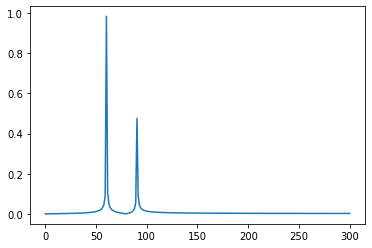

In [68]:
import matplotlib.pyplot as plt
import numpy as np


N = 500
T = 1.0 / 600.0
x = np.linspace(0.0, N*T, N)
y = np.sin(60.0 * 2.0*np.pi*x) + 0.5*np.sin(90.0 * 2.0*np.pi*x)
y_f = fft(y)
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
plt.show()

5847


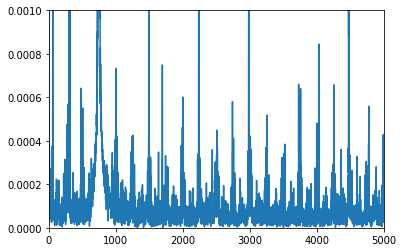

In [71]:
# FFT_Spindle
def fft_spindle(data):
    # FFT
    N = len(data) # 10000 (1초간 10000개 data 측정)
    T = 1.0 / 10000 # 측정 주기
    amp_x_dis = fft(data['x_dis'].values) # fft 결과 x_dis 열의 amplitude 값
    amp_y_dis = fft(data['y_dis'].values) # fft 결과 y_dis 열의 amplitude 값
    amp_x_dis = 2.0/N * np.abs(amp_x_dis[:N//2]) # 반만 필요
    amp_y_dis = 2.0/N * np.abs(amp_y_dis[:N//2])
    freq = np.linspace(0.0, 1.0/(2.0*T), N//2) # frequency (반만 가져옴)
    return freq, amp_x_dis, amp_y_dis

# 5000번째 1초간 data 입력 시 fft 변환 결과
print(len(t_data))
frequency, amplitude_x, amplitude_y = fft_spindle(t_data[5000])
plt.plot(frequency, amplitude_x)
plt.xlim(0, 5000)
plt.ylim(0, 0.001)
plt.show()

### EX) 60000번째 데이터의 x축 변위 FFT Plot
* 첫 번째 그래프 : time domain
* 두 번째 그래프 : freq domain
* 세 번째 그래프 : freq domain 잎-줄기 그림

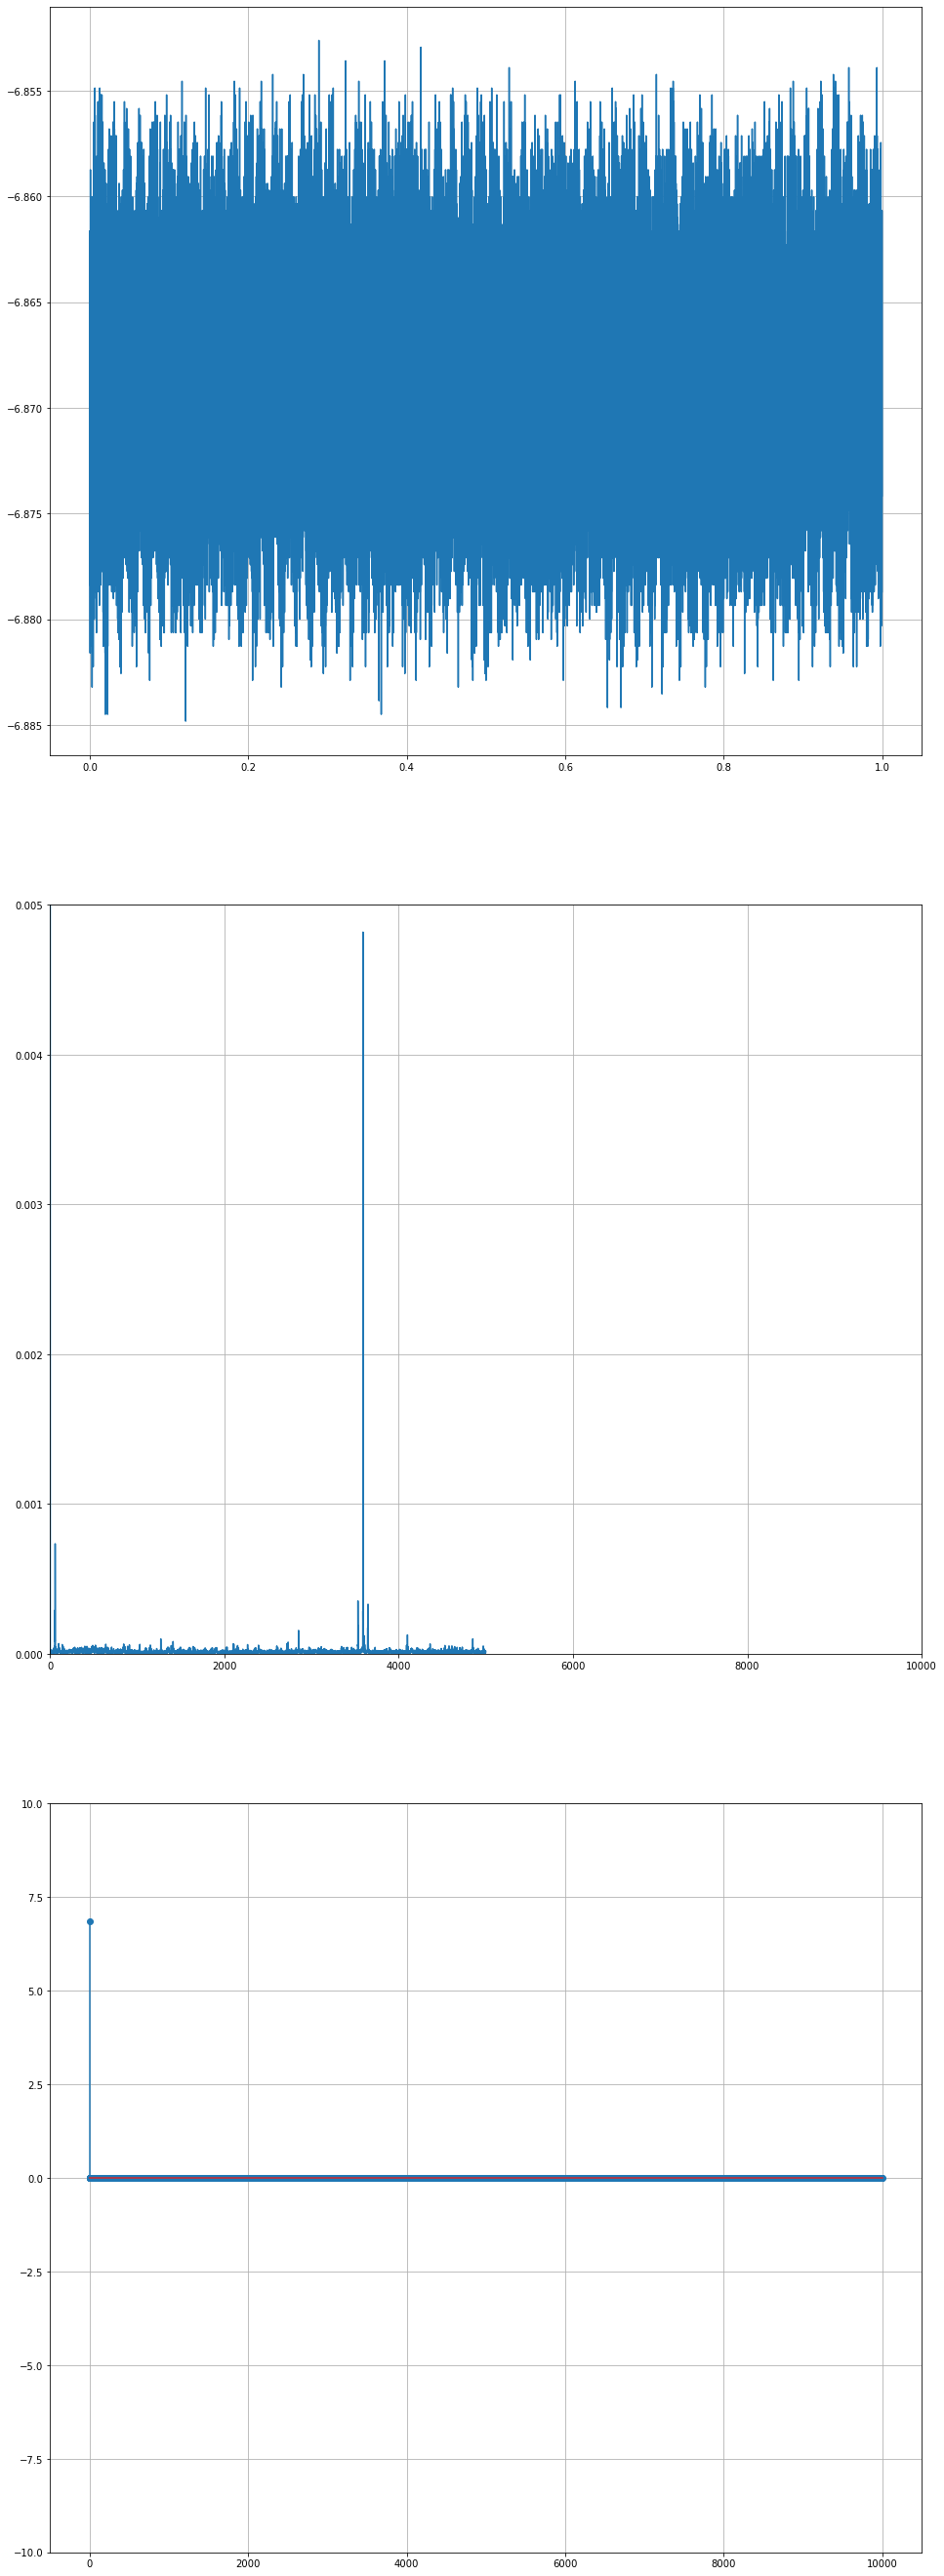

In [127]:
# fig = plt.figure(figsize=(16, 48))
# ax1 = fig.add_subplot(3,1,1)
# ax1.plot(t_data[65000]['time'].values, t_data[65000]['x_dis'].values)
# ax1.grid()

# ax2 = fig.add_subplot(3,1,2)
# ax2.set_xlim(0, 10000)
# ax2.set_ylim(0, 0.005)
# ax2.plot(freq, amplitude_x[65000])
# ax2.grid()

# ax3 = fig.add_subplot(3,1,3)
# ax3.stem(amplitude_x[65000], use_line_collection=True)
# ax3.set_ylim(-10,10)
# ax3.grid()

# plt.show()

# 3. 새로운 df 생성

In [42]:
threshold = 0.001

filteredFreq = []
numPop_total = [] # x, y distance 총 튄 값 개수
numPop_x = [] # x distance 튄 값 개수 list
numPop_y = [] # y distance 튄 값 개수 list
popVal_x = [] # x distance 튄 값들의 평균값 list
popVal_y = [] # y distance 튄 값들의 평균값 list
popVal_mean = [] # x, y 전체 튄 값들의 평균값 list

for i in range(30000, len(t_data)): # 30000 기준으로 두 번 나눠서 진행! (kernel 죽음..)
    freq, pop_x, pop_y = fft_spindle(t_data[i])
    pop_x[0] = 0 # 맨 처음 값은 FFT 특성 상 큰 값을 가지므로 무시
    pop_y[0] = 0
    freq = np.where(((pop_x > threshold) | (pop_y > threshold)), freq, 0)
    # print(len(freq))
    # print(np.count_nonzero(freq))
    pop_x = np.where(pop_x > threshold, pop_x, 0) # 튄 값만 그대로 두고 나머지는 0
    pop_y = np.where(pop_y > threshold, pop_y, 0)
    # print(len(pop_x))
    # print(np.count_nonzero(pop_x))
    
    filteredFreq.append(freq[np.nonzero(freq)]) # 튄 값의 freq를 하나의 리스트로
    numPop_total.append(np.count_nonzero(freq))
    numPop_x.append(np.count_nonzero(pop_x))
    numPop_y.append(np.count_nonzero(pop_y))
    popVal_x.append(np.sum(pop_x) / np.count_nonzero(pop_x))
    popVal_y.append(np.sum(pop_y) / np.count_nonzero(pop_y))
    popVal_mean.append((np.sum(pop_x) + np.sum(pop_y)) /
                       (np.count_nonzero(pop_x) + np.count_nonzero(pop_y)))
    
    if i % 10000 == 0:
        print(str(i) + ' data transformed.')

print(pop_x)
print(len(t_data[65000]))
# print(numPop_x)
# print(numPop_y)
# print(popVal)
print()
print(len(filteredFreq), len(numPop_total), len(numPop_x), len(numPop_y),
      len(popVal_x), len(popVal_y), len(popVal_mean))

30000 data transformed.
40000 data transformed.
50000 data transformed.
60000 data transformed.
[0. 0. 0. ... 0. 0. 0.]
10000

36524 36524 36524 36524 36524 36524 36524


In [43]:
# transformed dataframe
transDF = pd.DataFrame({
    'Filtered_freq_list' : filteredFreq,
    'popCount_freq' : numPop_total,
    'popCount_x' : numPop_x,
    'popCount_y' : numPop_y,
    'popDegree_mean_x' : popVal_x,
    'popDegree_mean_y' : popVal_y,
    'popDegree_total_mean' : popVal_mean
})
print(transDF)

                                      Filtered_freq_list  popCount_freq  \
0      [317.06341268253647, 318.0636127225445, 319.06...             36   
1      [317.06341268253647, 318.0636127225445, 319.06...             30   
2      [58.01160232046409, 318.0636127225445, 319.063...             39   
3      [58.01160232046409, 318.0636127225445, 319.063...             31   
4      [318.0636127225445, 319.0638127625525, 748.149...             32   
...                                                  ...            ...   
36519  [2270.4540908181634, 2271.4542908581716, 2272....              6   
36520  [2275.4550910182033, 2276.4552910582115, 2277....              8   
36521  [2282.4564912982596, 2283.456691338268, 2284.4...              5   
36522  [2286.4572914582914, 2287.4574914982995, 2288....              7   
36523  [2291.4582916583317, 2292.4584916983395, 2293....              6   

       popCount_x  popCount_y  popDegree_mean_x  popDegree_mean_y  \
0              29          20 

In [44]:
transDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36524 entries, 0 to 36523
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Filtered_freq_list    36524 non-null  object 
 1   popCount_freq         36524 non-null  int64  
 2   popCount_x            36524 non-null  int64  
 3   popCount_y            36524 non-null  int64  
 4   popDegree_mean_x      36524 non-null  float64
 5   popDegree_mean_y      36524 non-null  float64
 6   popDegree_total_mean  36524 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 2.0+ MB


Text(0.5, 0.92, 'first 30000 data')

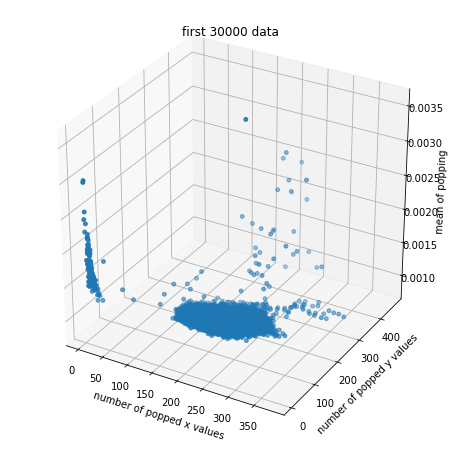

In [29]:
# 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transDF['pop_x'], transDF['pop_y'], transDF['pop_mean'], marker='o', s=15)
ax.set_xlabel('number of popped x values')
ax.set_ylabel('number of popped y values')
ax.set_zlabel('mean of popping')
plt.title('first 30000 data')

Text(0.5, 0.92, 'last 36524 data')

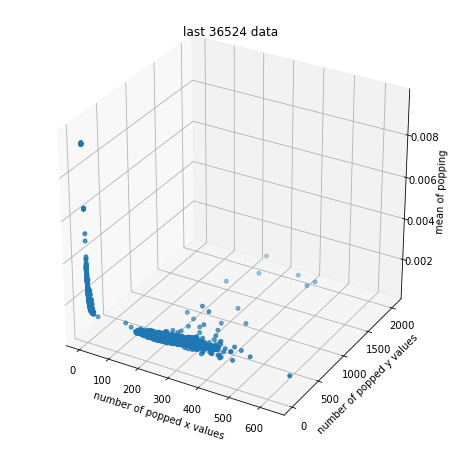

In [26]:
# 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transDF['pop_x'], transDF['pop_y'], transDF['pop_mean'], marker='o', s=15)
ax.set_xlabel('number of popped x values')
ax.set_ylabel('number of popped y values')
ax.set_zlabel('mean of popping')
plt.title('last 36524 data')

## transformed dataframe 저장

In [41]:
# transformed dataframe pickle로 저장 (~30000)
with open('/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/transformed_data_0.pickle', 'wb') as fw:
    pickle.dump(transDF, fw)

In [45]:
# transformed dataframe pickle로 저장 (30000~)
with open('/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/transformed_data_1.pickle', 'wb') as fw:
    pickle.dump(transDF, fw)

# 4. 2개로 나눈 Dataframe을 다시 병합 및 저장

In [46]:
# pickle data 불러오기
with open("/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/transformed_data_0.pickle", "rb") as f1:
    partial_data_0 = pickle.load(f1)
    
with open("/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/transformed_data_1.pickle", "rb") as f2:
    partial_data_1 = pickle.load(f2)

In [47]:
transformed_dataframe = pd.concat([partial_data_0, partial_data_1], axis=0, ignore_index=True)

print(len(partial_data_0))
print(len(partial_data_1))
print(len(transformed_dataframe))

30000
36524
66524


In [48]:
transformed_dataframe.head()

,Filtered_freq_list,popCount_freq,popCount_x,popCount_y,popDegree_mean_x,popDegree_mean_y,popDegree_total_mean
0,"[3968.7937587517504, 3969.793958791758, 3970.7...",3,3,3,0.002493,0.002519,0.002506
1,"[3969.793958791758, 3970.7941588317663, 3971.7...",3,3,3,0.002427,0.002444,0.002435
2,"[3970.7941588317663, 3971.794358871774, 3972.7...",3,3,3,0.002519,0.002536,0.002528
3,"[3970.7941588317663, 3971.794358871774, 3972.7...",5,5,5,0.002050,0.002058,0.002054
4,"[1.0002000400080016, 2.000400080016003, 3.0006...",28,28,21,0.002241,0.002098,0.002180


In [49]:
transformed_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66524 entries, 0 to 66523
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Filtered_freq_list    66524 non-null  object 
 1   popCount_freq         66524 non-null  int64  
 2   popCount_x            66524 non-null  int64  
 3   popCount_y            66524 non-null  int64  
 4   popDegree_mean_x      66524 non-null  float64
 5   popDegree_mean_y      66524 non-null  float64
 6   popDegree_total_mean  66524 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.6+ MB


In [51]:
# transformed dataframe pickle로 저장
with open('/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/transformed_dataframe.pickle', 'wb') as w:
    pickle.dump(transformed_dataframe, w)

In [ ]:
# transformed dataframe 불러오기